In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model definitions

In [31]:
# iteration x class
def get_df(mode, polluted_ratio):
    acc       = pd.read_csv(f"test_{mode}_accuracy_p{polluted_ratio}.csv")
    acc_cls   = pd.read_csv(f"test_{mode}_accuracy_cls_p{polluted_ratio}.csv")
    violation = pd.read_csv(f"test_{mode}_violation_p{polluted_ratio}.csv")
    
    acc["mode"]=mode
    acc["polluted_ratio"]=polluted_ratio
    
    acc_cls["mode"]=mode
    acc_cls["polluted_ratio"]=polluted_ratio
    
    violation["mode"]=mode
    violation["polluted_ratio"]=polluted_ratio
        
    return acc, acc_cls, violation


In [136]:
# class x iteration
def get_df2(mode, polluted_ratio):
    acc       = pd.read_csv(f"test_{mode}_accuracy_p{polluted_ratio}.csv").T
    acc_cls   = pd.read_csv(f"test_{mode}_accuracy_cls_p{polluted_ratio}.csv").T
    violation = pd.read_csv(f"test_{mode}_violation_p{polluted_ratio}.csv").T  
    
    acc["mode"]=mode
    acc["polluted_ratio"]=polluted_ratio
    
    acc_cls["mode"]=mode
    acc_cls["polluted_ratio"]=polluted_ratio
    
    violation["mode"]=mode
    violation["polluted_ratio"]=polluted_ratio
    
    if mode == "baseline" or mode == "ideal":
        for iter in range(1,10):
            acc[iter] = acc[0]
            acc_cls[iter] = acc_cls[0]
            violation[iter] = violation[0]
        
    return acc.iloc[1:,:].reset_index(), acc_cls.iloc[1:,:].reset_index(), violation.iloc[1:,:].reset_index()

# t1,t2,t3 = get_df2("lb",0.3)
# t2

In [137]:
modes=['baseline','ideal','lb','fair_naive','fair']
polluted_ratio = 0.3

accs       = pd.DataFrame()
accs_cls   = pd.DataFrame()
violations = pd.DataFrame()

accs_T       = pd.DataFrame()
accs_cls_T   = pd.DataFrame()
violations_T = pd.DataFrame()

for mode in modes :
    
    acc, acc_cls, violation = get_df(mode,polluted_ratio)

    accs       = accs.append(acc)
    accs_cls   = accs_cls.append(acc_cls)
    violations = violations.append(violation)
    
    acc, acc_cls, violation = get_df2(mode,polluted_ratio)

    accs_T       = accs_T.append(acc)
    accs_cls_T   = accs_cls_T.append(acc_cls)
    violations_T = violations_T.append(violation)
    
accs       = accs.rename(columns={'Unnamed: 0': 'Iteration', '0':'Accuracy'})
accs_cls   = accs_cls.rename(columns={'Unnamed: 0': 'Iteration'})
violations = violations.rename(columns={'Unnamed: 0': 'Iteration'})

accs_cls['Average'] = accs_cls.iloc[:,1:11].mean(axis=1)
violations['Average'] = violations.iloc[:,1:11].mean(axis=1)

accs_T       = accs_T.rename(columns={'index': 'Class'})
accs_cls_T   = accs_cls_T.rename(columns={'index': 'Class'})
violations_T = violations_T.rename(columns={'index': 'Class'})

In [138]:
# accs_cls_T

In [139]:
def plot1(dat):
    fig = plt.figure()
    
    #lb, fair_naive, fair
    ax = sns.lineplot(data=dat[dat["mode"].isin(["lb","fair","fair_naive"])],x='Iteration', y='Accuracy',hue='mode')
    
    #baseline
    baseline = dat[dat["mode"].isin(["baseline"])]['Accuracy'].values[0]
    plt.axhline(y=baseline, c="y", linestyle="dashed", label="Baseline")
    
    #ideal
    ideal = dat[dat["mode"].isin(["ideal"])]['Accuracy'].values[0]
    plt.axhline(y=ideal,c="r",linestyle="dashed", label="Ideal")

    labels = ["Label Bias", "FAIR Naive", "FAIR", "Baseline", "Ideal"]
    handles, _ = ax.get_legend_handles_labels()

    plt.legend(handles = handles, labels = labels)

    plt.show()

## Accuracy

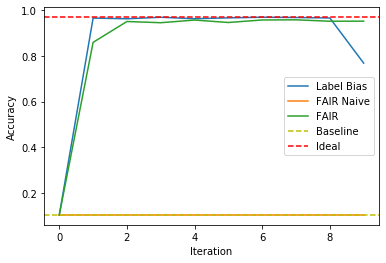

In [140]:
plot1(accs)

In [184]:
# x: iteration
# y: target value
def plot2(dat, class_idx=-1, label="Accuracy"):
    fig = plt.figure()
    
    if class_idx == -1:
        class_idx = "Average"
    else :
        class_idx = str(class_idx)

    #lb, fair_naive, fair
    ax = sns.lineplot(data=dat[dat["mode"].isin(["lb","fair","fair_naive"])], \
                      x='Iteration', \
                      y=class_idx, \
                      hue='mode')

    #baseline
    baseline = dat[dat["mode"].isin(["baseline"])][class_idx].values[0]
    plt.axhline(y=baseline,c="y",linestyle="dashed", label="Baseline")
    
    #ideal
    ideal    = dat[dat["mode"].isin(["ideal"])][class_idx].values[0]
    plt.axhline(y=ideal, c="r", linestyle="dashed", label="Ideal")

    #set legend labels
    labels = ["Label Bias", "FAIR Naive", "FAIR", "Baseline", "Ideal"]
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(handles = handles, labels = labels)
    
    #set y axis labels
    ax.set_ylabel(label)

    plt.show()

In [185]:
# x : class
# y : target value
# use "_T" dataframes
def plot3(dat, iteration=8, label="Accuracy"):
    fig = plt.figure()
  
    #lb, fair_naive, fair
    ax = sns.lineplot(data=dat[dat["mode"].isin(["lb","fair_naive","fair","baseline","ideal"])], \
#     ax = sns.lineplot(data=dat[dat["mode"].isin(["fair"])], \
                      x="Class", \
                      y=iteration, \
                      hue='mode')           
    
    labels = ["Baselin","Ideal","Label Bias","FAIR naive", "FAIR "]
    handles, _ = ax.get_legend_handles_labels()
  
    ax.set_ylabel(label)

    plt.legend(handles = handles, labels = labels)

    plt.show()

# plot3(accs_cls_T)

## Violation

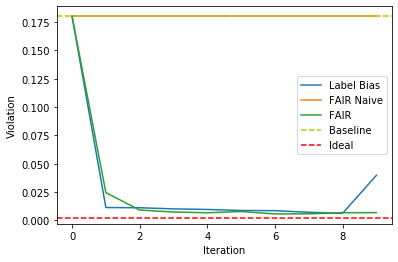

In [186]:
plot2(violations, label="Violation")

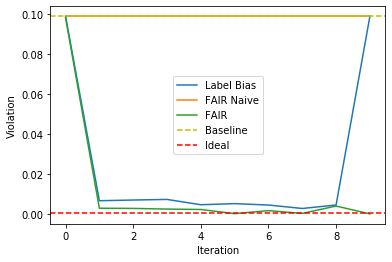

In [188]:
plot2(violations,class_idx=0,label="Violation")

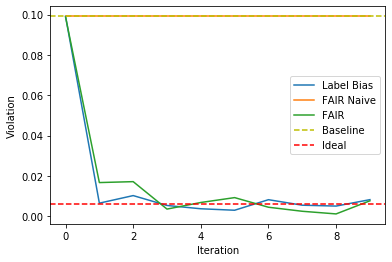

In [190]:
plot2(violations,class_idx=9,label="Violation")

## Per-class accuracy

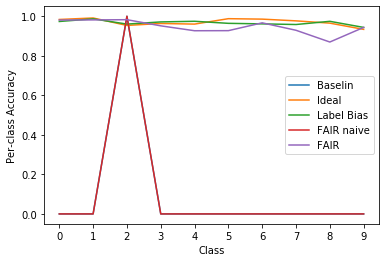

In [191]:
# Per-class accuracy for an iteration
# defualt iteration is 9
plot3(accs_cls_T, iteration=5, label="Per-class Accuracy")

## Per-class Violation

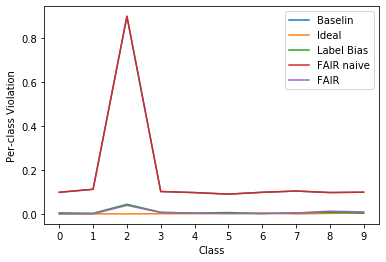

In [192]:
plot3(violations_T, iteration=5, label="Per-class Violation")